# WCWH Rollout Preparation
Working to get the beacons ready for their next adventure. 

In [60]:
import warnings
warnings.filterwarnings('ignore')

# Calibration Inspection
Looking at the results from the calibration experiments

In [61]:
import os
import sys
sys.path.append('../')

import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from src.visualization import visualize
from src.processing import process

from src.calibration import calibrate

import math
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model Comparison

In [62]:
class comparison:
    
    def __init__(self,param,env1,env2):
        self.param = param
        self.env1 = env1
        self.env2 = env2
        
        self.data = self.import_and_combine(self.param,self.env1,self.env2)
        self.set_diffs()
        
    def import_and_combine(self,param,env1,env2):
        """
        Imports and combines data for the given sensor
        """
        df1 = pd.read_csv(f"../data/interim/{param}-linear_model_{env1}-wcwh_s21.csv",index_col=0)
        df2 = pd.read_csv(f"../data/interim/{param}-linear_model_{env2}-wcwh_s21.csv",index_col=0)
        
        return df1.merge(df2,left_index=True,right_index=True,suffixes=[f"_{env1}",f"_{env2}"])
    
    def set_diffs(self):
        """
        Gets the raw and percent differences between environemnts
        """
        for x in ["constant","coefficient"]:
            self.data[f"{x}_diff"] = self.data[f"{x}_{self.env1}"] - self.data[f"{x}_{self.env2}"]
            self.data[f"{x}_per_diff"] = self.data[f"{x}_diff"] / self.data[f"{x}_{self.env1}"] * 100
            
    def plot_diffs(self,save=False):
        """
        Plots the percent differences
        """
        df = self.data.copy()
        df.index = df.index.map(str)

        _, ax = plt.subplots(figsize=(16,4))
        ax.scatter(df.index,df["constant_per_diff"],s=50,color="black",zorder=10,label="$x_0$")
        ax.scatter(df.index,df["coefficient_per_diff"],s=60,color="firebrick",marker="s",zorder=1,label="$x_1$")
        ax.axhline(0,lw=2,ls="dashed",color="black")
        # x-axis
        ax.set_xlabel("Device Number",fontsize=16)
        # y-axis
        ax.set_ylabel("Percent Change",fontsize=16)
        # other
        ax.tick_params(labelsize=14)
        for loc in ["top","right"]:
            ax.spines[loc].set_visible(False)
        ax.legend(frameon=False,fontsize=14)

        if save:
            plt.savefig(f"../reports/figures/calibration-parameter_difference-{self.param}.pdf",bbox_inches="tight")
        plt.show()
        plt.close()

## Carbon Dioxide
Between testhouse and chamber

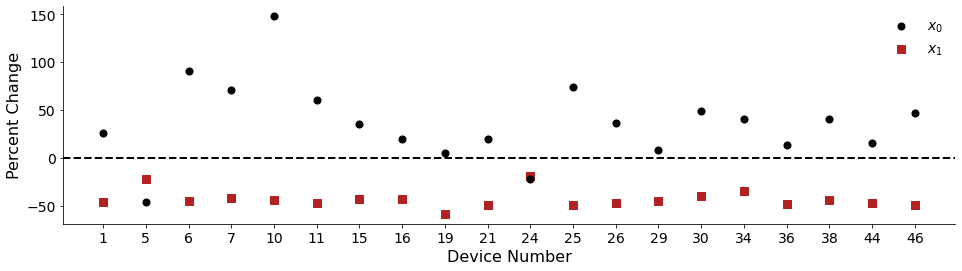

In [63]:
co2_comp = comparison("co2","testhouse","chamber")
co2_comp.plot_diffs(save=False)

In [64]:
#co2_diff.sort_values("constant_per_diff")

---

## Particulate Matter

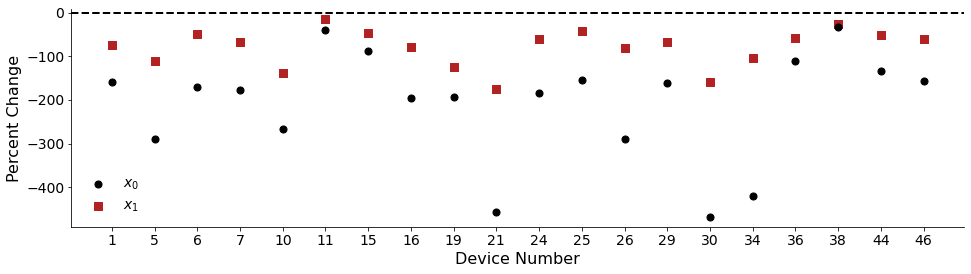

In [65]:
pm_comp = comparison("pm2p5_mass","testhouse","chamber")
pm_comp.plot_diffs(save=False)

In [66]:
pm_comp.data.sort_values("coefficient_testhouse")

,constant_testhouse,coefficient_testhouse,constant_chamber,coefficient_chamber,constant_diff,constant_per_diff,coefficient_diff,coefficient_per_diff
beacon,,,,,,,,
30,-3.091158,1.624765,-17.565979,4.199848,14.474820,-468.265244,-2.575083,-158.489573
21,-4.851254,1.765246,-27.037784,4.835381,22.186530,-457.335959,-3.070135,-173.921110
6,-7.395115,1.996449,-20.031402,2.961086,12.636287,-170.873441,-0.964637,-48.317653
11,-9.902424,2.102598,-13.872387,2.420540,3.969964,-40.090827,-0.317942,-15.121398
34,-4.185789,2.113211,-21.746033,4.305310,17.560245,-419.520571,-2.192099,-103.733090
26,-6.460552,2.311273,-25.178718,4.201816,18.718166,-289.730125,-1.890543,-81.796606
10,-8.384917,2.454119,-30.678068,5.875010,22.293151,-265.872045,-3.420891,-139.393866
36,-9.909055,2.744331,-20.824433,4.338043,10.915377,-110.155578,-1.593712,-58.072875
7,-9.080300,2.781336,-25.256606,4.664420,16.176306,-178.147265,-1.883084,-67.704280


---

## Carbon Monoxide
We will have to treat CO slighlty different since we have two environments but one is a constant model while the other is a linear model.

In [67]:
co_standard = pd.read_csv("../data/interim/co-linear_model-ux_s20.csv",index_col=0)
co_standard.dropna(inplace=True)
print("Number of Beacons:", len(co_standard))

Number of Beacons: 21


We only have 18 of the 20 devices because the CO sensor on Devices 19 and 46 went AWOL. 

### Getting Corrected Data 
Need to combine the corrected data into one file

#### Experiment Details
Start and stop times for the experiments

In [68]:
exp_details = pd.read_excel("../data/calibration/co_standard_experiment_details.xlsx",index_col=0)

In [69]:
print("Number of Beacons:", len(exp_details))
print(sorted(exp_details.index.values))

Number of Beacons: 21
[1, 5, 6, 7, 10, 11, 15, 16, 19, 21, 24, 25, 26, 29, 30, 32, 34, 36, 38, 44, 46]


#### Results
The final results from the calibration process

In [70]:
co_res = pd.read_csv("../data/interim/co-linear_model-ux_s20.csv",index_col=0)
co_res.dropna(inplace=True)

In [71]:
print("Number of Beacons:", len(co_res))
print(sorted(co_res.index.values))

Number of Beacons: 21
[1, 5, 6, 7, 10, 11, 15, 16, 19, 21, 24, 25, 26, 29, 30, 32, 34, 36, 38, 44, 46]


#### Corrected Data
Combining the corrected data from each of the beacons

In [72]:
pp = process.preprocess()
co_data = pd.DataFrame()
for bb in sorted(exp_details.index.values):
    s = exp_details.loc[bb,"start"]
    e = exp_details.loc[bb,"end"]
    pp.process([bb],datetime.strptime(s[9:-1],"%Y,%m,%d,%H,%M,%S"),datetime.strptime(e[9:-1],"%Y,%m,%d,%H,%M,%S"))
    print(f"Beacon: {bb}\n\tN: {len(pp.data)}\n\tStart:\t{s}\n\tEnd:\t{e}")
    if bb not in [32]:
        co_data = co_data.append(pp.data)

Beacon: 1
	N: 480
	Start:	datetime(2021,10,4,13,45,0)
	End:	datetime(2021,10,4,21,45,0)
Beacon: 5
	N: 0
	Start:	datetime(2021,10,12,8,35,0)
	End:	datetime(2021,10,12,16,35,0)
Beacon: 6
	N: 480
	Start:	datetime(2021,10,6,13,40,0)
	End:	datetime(2021,10,6,21,40,0)
Beacon: 7
	N: 480
	Start:	datetime(2021,10,4,13,45,0)
	End:	datetime(2021,10,4,21,45,0)
Beacon: 10
	N: 480
	Start:	datetime(2021,10,18,13,35,0)
	End:	datetime(2021,10,18,21,35,0)
Beacon: 11
	N: 0
	Start:	datetime(2021,10,28,8,50,0)
	End:	datetime(2021,10,28,14,50,0)
Beacon: 15
	N: 480
	Start:	datetime(2021,10,5,9,15,0)
	End:	datetime(2021,10,5,17,15,0)
Beacon: 16
	N: 0
	Start:	datetime(2021,10,28,8,50,0)
	End:	datetime(2021,10,28,14,50,0)
Beacon: 19
	N: 360
	Start:	datetime(2021,10,28,8,50,0)
	End:	datetime(2021,10,28,14,50,0)
Beacon: 21
	N: 480
	Start:	datetime(2021,10,8,7,12,0)
	End:	datetime(2021,10,8,15,12,0)
Beacon: 24
	N: 0
	Start:	datetime(2021,10,5,9,15,0)
	End:	datetime(2021,10,5,17,15,0)
Beacon: 25
	N: 480
	Start:	dat

In [73]:
def show_comprehensive_co_timeseries(data,res,step_length=2,base_vals=[0,1,2,4],r=4,c=5,save=False,verbose=False,**kwargs):
    """shows a subplot of all the correlation beacons"""
    fig, axes = plt.subplots(r,c,figsize=(c*4,r*4),sharex=True,sharey=True,gridspec_kw={"wspace":0.1})
    data.sort_values(["beacon","timestamp"],axis="rows",inplace=True)
    for bb, ax in zip(res.index,axes.flat):
        # beacon data
        beacon = data[data["beacon"] == bb]
        # reference values
        ref_vals = []
        for val in base_vals:
            ref_vals += [val]*int(step_length*60)

        if verbose:
            print(f"Beacon {bb}: {len(beacon)}")
        
        if bb in [5,11,16,24]:
            ax.text(220,2,"Original\nData Lost",ha="center",va="center",fontsize=20)
        elif bb in [19,38,46]:
            ax.text(220,2,"Sensor\nMalfunction",ha="center",va="center",fontsize=20)
        else:
            ax.scatter(np.arange(len(beacon)),beacon["co"],color="firebrick",lw=2,s=5,zorder=20,label="Corrected")
            ax.plot(np.arange(len(ref_vals)),ref_vals,color="black",lw=2,zorder=10, label="Reference")
        
        if "min_val" in kwargs.keys():
            min_val = kwargs["min_val"]
        else:
            min_val = -0.5

        if "max_val" in kwargs.keys():
            max_val = kwargs["max_val"]
        else:
            max_val = 6

        ax.set_ylim([min_val,max_val])

        # annotating
        try:
            r2 = res.loc[bb,"score"]
        except ValueError:
            r2 = 0
        ax.set_title(f"  Device {int(bb)}\n  r$^2$ = {round(r2,3)}\n  y = {round(res.loc[bb,'coefficient'],2)}x + {round(res.loc[bb,'constant'],2)}",
                y=0.85,pad=0,fontsize=13,loc="left",ha="left")

        ax.set_xticks(np.arange(0,520,120))
        ax.axis('off')

    axes[r-1,0].axis('on')
    for loc in ["top","right"]:
        axes[r-1,0].spines[loc].set_visible(False)
    plt.setp(axes[r-1,0].get_xticklabels(), ha="center", rotation=0, fontsize=16)
    plt.setp(axes[r-1,0].get_yticklabels(), ha="right", rotation=0, fontsize=16)
    axes[r-1,0].legend(loc="upper center",bbox_to_anchor=(0.5,-0.1),ncol=2,frameon=False,fontsize=14)
    fig.add_subplot(111, frame_on=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)
    plt.xlabel("Experiment Time (min)",fontsize=18)
    plt.ylabel(f"{visualize.get_pollutant_label('co')} ({visualize.get_pollutant_units('co')})",fontsize=18)

    # removing any empty axes
    if len(data["beacon"].unique()) < r*c:
        for i in range(r*c-len(data["beacon"].unique())):
            axes.flat[-1*(i+1)].axis("off")

    if save:
        plt.savefig(f"../reports/figures/beacon_summary/calibration-co-standard-step_comparison-ux_s20.pdf",bbox_inches="tight")

    plt.show()
    plt.close()

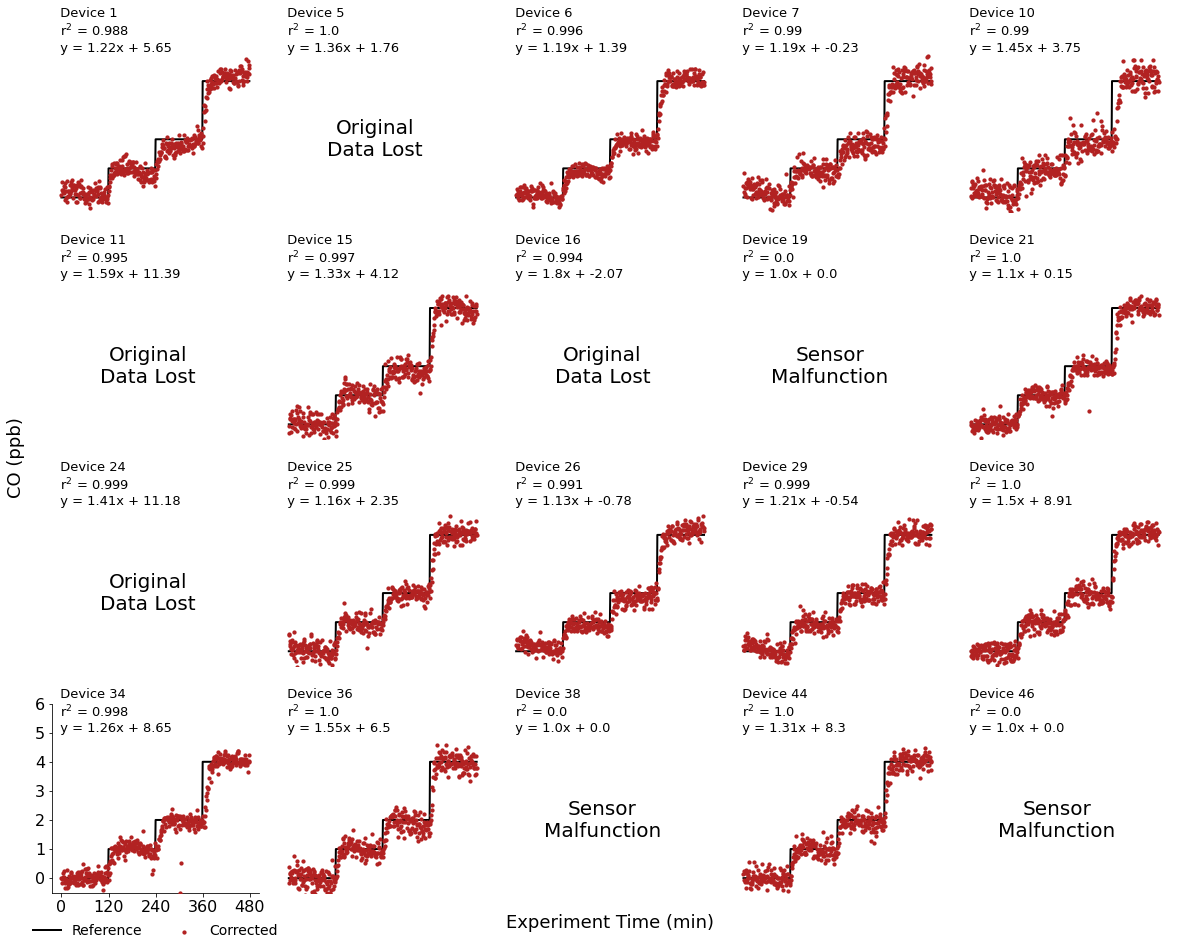

In [76]:
show_comprehensive_co_timeseries(co_data,co_res.drop([32],axis=0),r=4,c=5,save=False)

In [75]:
print(round(co_res,2).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  constant &  coefficient &  score \\
beacon &           &              &        \\
\midrule
1      &      5.65 &         1.22 &   0.99 \\
5      &      1.76 &         1.36 &   1.00 \\
6      &      1.39 &         1.19 &   1.00 \\
7      &     -0.23 &         1.19 &   0.99 \\
10     &      3.75 &         1.45 &   0.99 \\
11     &     11.39 &         1.59 &   1.00 \\
15     &      4.12 &         1.33 &   1.00 \\
16     &     -2.07 &         1.80 &   0.99 \\
19     &      0.00 &         1.00 &   0.00 \\
21     &      0.15 &         1.10 &   1.00 \\
24     &     11.18 &         1.41 &   1.00 \\
25     &      2.35 &         1.16 &   1.00 \\
26     &     -0.78 &         1.13 &   0.99 \\
29     &     -0.54 &         1.21 &   1.00 \\
30     &      8.91 &         1.50 &   1.00 \\
32     &     11.25 &         1.64 &   0.99 \\
34     &      8.65 &         1.26 &   1.00 \\
36     &      6.50 &         1.55 &   1.00 \\
38     &      0.00 &         1.00 &   0.00 \

### Comparing Constant and Linear Models
Not a totally fair comparison but it works

#### Constant Data

In [115]:
co_constant = pd.read_csv("../data/interim/co-constant_model-ux_s20.csv",index_col=0)
co_constant["constant"] *= -1
co_constant.drop([32],axis=0,inplace=True)

#### ZAG Data
Constant model from the ZAG

In [145]:
co_zag = pd.read_csv("../data/interim/co-constant_model-wcwh_s21.csv",index_col=0)
co_zag["constant"] *= -1

#### Plotting Differences

In [138]:
def plot_diff_params(env1, env2, env1_label, env2_label, param="constant",save=False):
    """
    """
    merged = env1.merge(env2,left_index=True,right_index=True,suffixes=[f"_{env1_label}",f"_{env2_label}"])
    merged.sort_values([f"{param}_{env2_label}"],axis=0,inplace=True)
    #plotting
    _, ax = plt.subplots(figsize=(16,4))
    ax.scatter(np.arange(len(merged.index)),merged[f"{param}_{env1_label}"],label=env1_label,s=50,zorder=10,color="black")
    ax.scatter(np.arange(len(merged.index)),merged[f"{param}_{env2_label}"],label=env2_label,s=60,marker="s",zorder=1,color="firebrick")
    
    # x-axis
    ax.set_xticks(np.arange(len(merged.index)))
    ax.set_xticklabels(merged.index,fontsize=14)
    ax.set_xlabel("Device Number",fontsize=16)
    # y-axis
    ax.set_ylabel("$x_0$ (ppm)",fontsize=16)
    ax.set_yticks(np.arange(-4,14,2))
    
    ax.legend(frameon=False,fontsize=14)
    for loc in ["top","right"]:
        ax.spines[loc].set_visible(False)
    ax.tick_params(labelsize=16)
    
    if save:
        plt.savefig(f"../reports/figures/beacon_summary/calibration-co-env_comparison-ux_s20.pdf",bbox_inches="tight")
    plt.show()
    plt.close()
    
    return merged

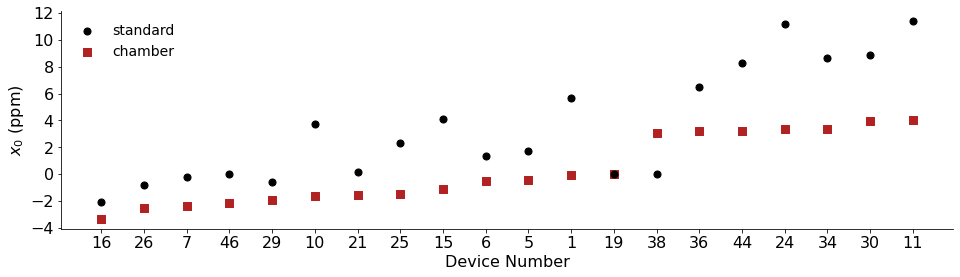

In [139]:
_ = plot_diff_params(co_res,co_constant,"standard","chamber",save=True)

In [166]:
def plot_three_diffs(env1, env2, env3, env1_label, env2_label, env3_label, param="constant",save=False):
    """
    """
    merged = env1.merge(env2,left_index=True,right_index=True,suffixes=[f"_{env1_label}",f"_{env2_label}"])
    merged = merged.merge(env3,left_index=True,right_index=True)
    merged.sort_values([f"{param}_{env2_label}"],axis=0,inplace=True)
    merged.drop([19,38,46],axis=0,inplace=True)
    #plotting
    _, ax = plt.subplots(figsize=(16,4))
    ax.scatter(np.arange(len(merged.index)),merged[f"{param}_{env1_label}"],label=env1_label.title(),s=50,zorder=10,color="black")
    ax.scatter(np.arange(len(merged.index)),merged[f"{param}_{env2_label}"],label=env2_label.title(),s=60,marker="s",zorder=1,color="firebrick")
    ax.scatter(np.arange(len(merged.index)),merged[f"{param}"],label=env3_label.title(),s=55,marker="d",zorder=1,color="cornflowerblue")
    
    # x-axis
    ax.set_xticks(np.arange(len(merged.index)))
    ax.set_xticklabels(merged.index,fontsize=14)
    ax.set_xlabel("Device Number",fontsize=16)
    # y-axis
    ax.set_ylabel("$x_0$ (ppm)",fontsize=16)
    ax.set_yticks(np.arange(-4,14,2))
    
    ax.legend(frameon=False,fontsize=14)
    for loc in ["top","right"]:
        ax.spines[loc].set_visible(False)
    ax.tick_params(labelsize=16)
    
    if save:
        plt.savefig(f"../reports/figures/beacon_summary/calibration-co-env_comparison-ux_s20.pdf",bbox_inches="tight")
    plt.show()
    plt.close()
    
    return merged

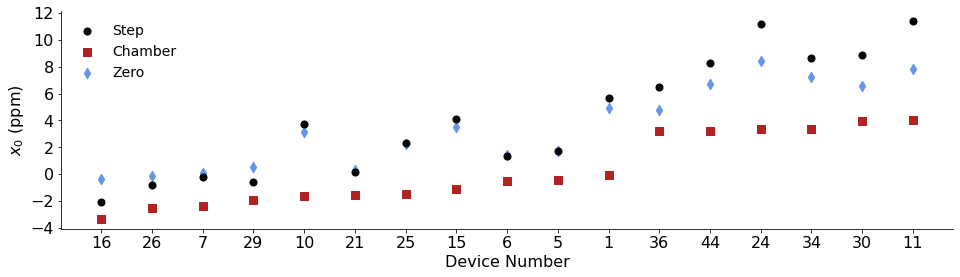

In [167]:
_ = plot_three_diffs(co_res,co_constant,co_zag,"step","chamber","zero",save=True)

---